# Install Dependencies and Fetch Dataset

In [1]:
random_state = 1
!pip install -r requirements.txt
from pprint import pprint

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
concrete_compressive_strength = fetch_ucirepo(id=165)

# data (as pandas dataframes)
X = concrete_compressive_strength.data.features
y = concrete_compressive_strength.data.targets

# metadata
pprint(concrete_compressive_strength.metadata)

# variable information
pprint(concrete_compressive_strength.variables)

{'abstract': 'Concrete is the most important material in civil engineering. '
             'The concrete compressive strength is a highly nonlinear function '
             'of age and ingredients. ',
 'additional_info': {'citation': None,
                     'funded_by': None,
                     'instances_represent': None,
                     'preprocessing_description': None,
                     'purpose': None,
                     'recommended_data_splits': None,
                     'sensitive_data': None,
                     'summary': 'Number of instances \t1030\r\n'
                                'Number of Attributes\t9\r\n'
                                'Attribute breakdown\t8 quantitative input '
                                'variables, and 1 quantitative output '
                                'variable\r\n'
                                'Missing Attribute Values\tNone \r\n',
                     'variable_info': 'Given are the variable name, variable '
     

## Data Preparation

In [3]:
# test and train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state
)

# Exploratory Data Analysis (EDA)

## Data Inspection

In [4]:
import pandas as pd

# Display the first few rows of the features and target
display(X_train.head())
display(y_train.head())
display(X_test.head())
display(y_test.head())

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
612,277.0,0.0,0.0,191.0,0.0,968.0,856.0,28
525,359.0,19.0,141.0,154.0,10.9,942.0,801.0,3
597,272.8,181.9,0.0,185.7,0.0,1012.4,714.3,28
846,366.0,187.0,0.0,191.0,7.0,824.0,757.0,28
259,212.6,0.0,100.4,159.4,10.4,1003.8,903.8,3


,Concrete compressive strength
612,25.97
525,25.12
597,31.38
846,65.91
259,13.33


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
339,297.2,0.0,117.5,174.8,9.5,1022.8,753.5,3
244,238.1,0.0,94.1,186.7,7.0,949.9,847.0,3
882,140.0,133.0,103.0,200.0,7.0,916.0,753.0,28
567,203.5,135.7,0.0,185.7,0.0,1076.2,759.3,7
923,162.0,207.0,172.0,216.0,10.0,822.0,638.0,28


,Concrete compressive strength
339,21.91
244,19.93
882,36.44
567,11.96
923,39.84


In [5]:
# Display the shape of the features and target
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (824, 8)
Shape of y_train: (824, 1)
Shape of X_test: (206, 8)
Shape of y_test: (206, 1)


In [6]:
# Display the data types of the features and target
print("Data types of features (X):")
print(X_train.dtypes)
print("\nData types of target (y):")
print(y_train.dtypes)

Data types of features (X):
Cement                float64
Blast Furnace Slag    float64
Fly Ash               float64
Water                 float64
Superplasticizer      float64
Coarse Aggregate      float64
Fine Aggregate        float64
Age                     int64
dtype: object

Data types of target (y):
Concrete compressive strength    float64
dtype: object


## Check for Missing Values

In [7]:
missing_values_X = X.isnull().sum()
missing_values_y = y.isnull().sum()
print("Missing values in features (X):")
print(missing_values_X)
print("\nMissing values in target (y):")
print(missing_values_y)

Missing values in features (X):
Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
dtype: int64

Missing values in target (y):
Concrete compressive strength    0
dtype: int64


## Summary Statistics

In [8]:
summary_X_train = X_train.describe()
print("Summary statistics for features (X_train):")
print(summary_X_train)

Summary statistics for features (X_train):
           Cement  Blast Furnace Slag     Fly Ash       Water  \
count  824.000000          824.000000  824.000000  824.000000   
mean   279.569053           71.445631   54.552670  181.516869   
std    104.483317           85.417432   64.271947   20.955400   
min    102.000000            0.000000    0.000000  121.800000   
25%    191.675000            0.000000    0.000000  164.900000   
50%    266.000000           19.500000    0.000000  185.000000   
75%    350.000000          142.500000  118.300000  192.000000   
max    540.000000          359.400000  200.100000  247.000000   

       Superplasticizer  Coarse Aggregate  Fine Aggregate         Age  
count        824.000000        824.000000      824.000000  824.000000  
mean           6.012257        973.564199      776.894782   44.609223  
std            5.792116         77.349064       78.344553   60.584698  
min            0.000000        801.000000      594.000000    1.000000  
25%        

In [9]:
summary_y_train = y_train.describe()
print("\nSummary statistics for target (y_train):")
print(summary_y_train)


Summary statistics for target (y_train):
       Concrete compressive strength
count                     824.000000
mean                       35.407828
std                        16.817911
min                         2.330000
25%                        23.047500
50%                        33.745000
75%                        45.370000
max                        81.750000


## Visualizations

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

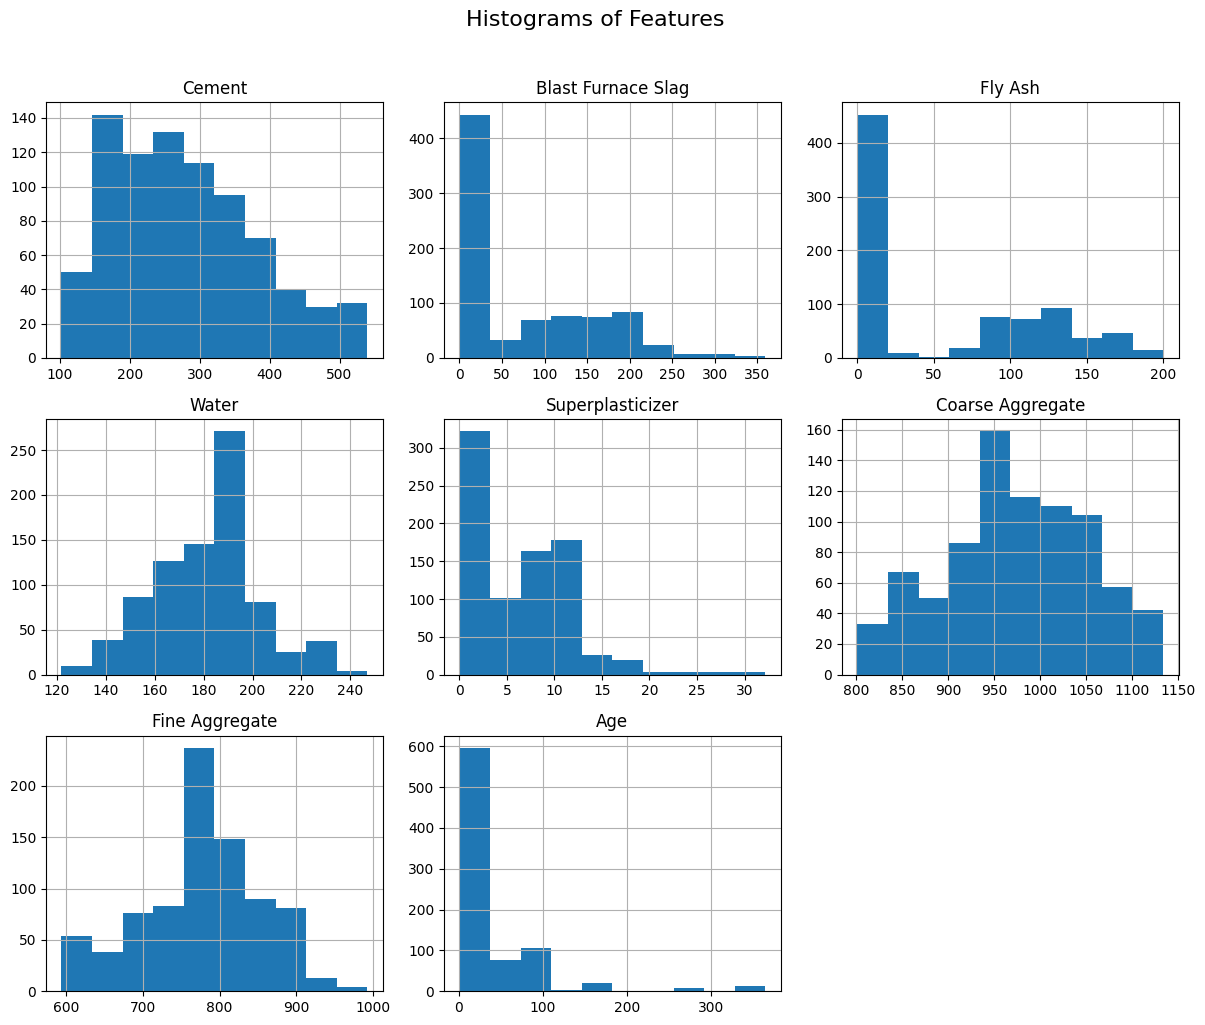

In [11]:
# Histograms for each feature
X_train.hist(figsize=(12, 10))
plt.suptitle("Histograms of Features", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

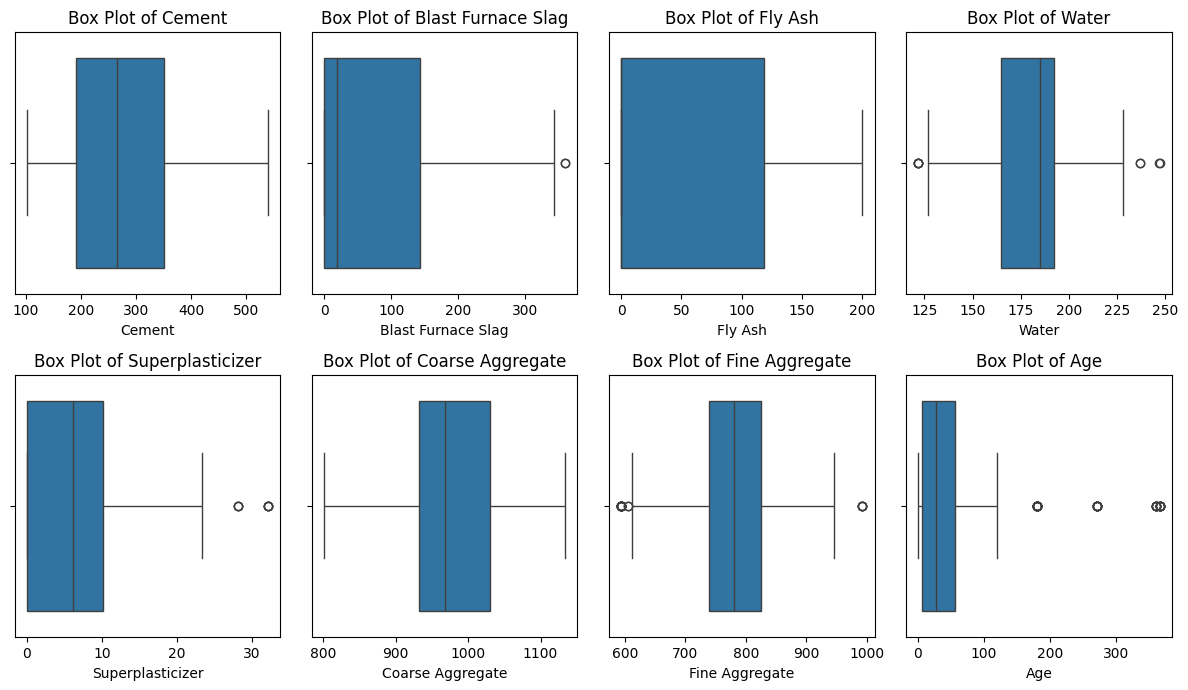

In [12]:
# Box plots for each feature
plt.figure(figsize=(12, 10))
for i, column in enumerate(X_train.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=X_train[column])
    plt.title(f"Box Plot of {column}")
plt.tight_layout()
plt.show()

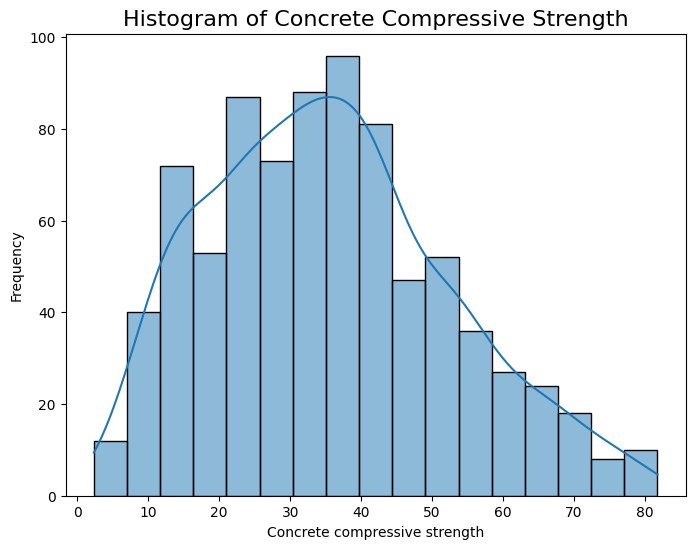

In [13]:
# Histogram of Concrete Compressive Strength
plt.figure(figsize=(8, 6))
sns.histplot(y_train["Concrete compressive strength"], kde=True)
plt.title("Histogram of Concrete Compressive Strength", fontsize=16)
plt.xlabel("Concrete compressive strength")
plt.ylabel("Frequency")
plt.show()

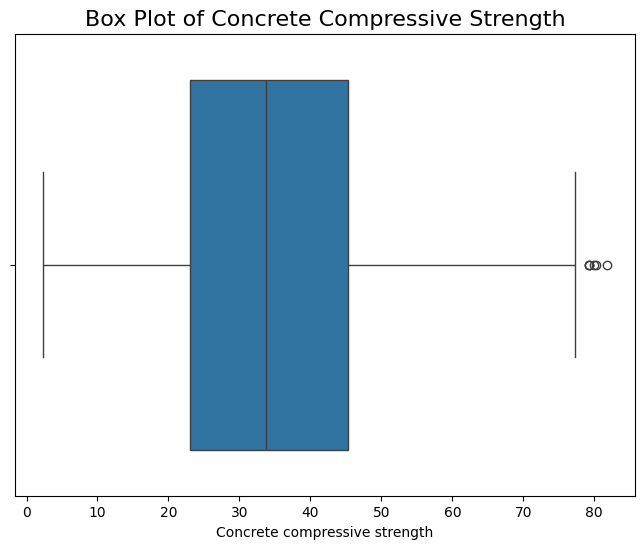

In [14]:
# Box Plot of Concrete Compressive Strength
plt.figure(figsize=(8, 6))
sns.boxplot(x=y_train["Concrete compressive strength"])
plt.title("Box Plot of Concrete Compressive Strength", fontsize=16)
plt.xlabel("Concrete compressive strength")
plt.show()

## Correlation Analysis

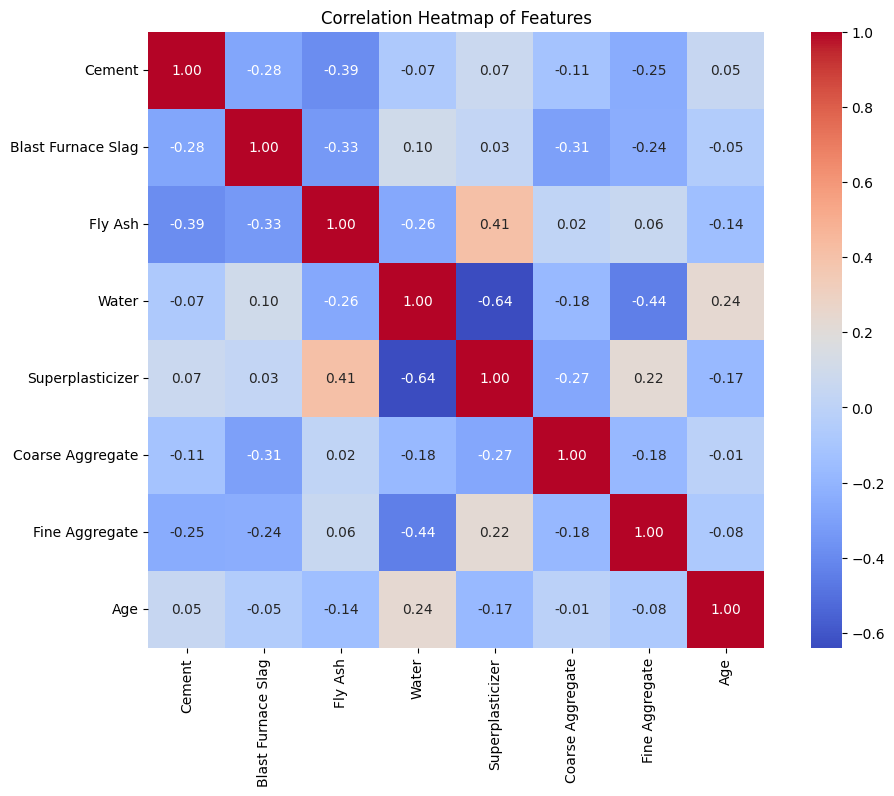

In [15]:
plt.figure(figsize=(12, 8))
correlation_matrix = X_train.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Features")
plt.show()

# Bayesian Optimization

## Objective Function

The goal is to optimize the concrete compressive strength using Bayesian optimization. The objective function will be defined to minimize the negative of the compressive strength, as we want to maximize it. The parameters to be optimized will include the features of the concrete mix.

In [16]:
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestRegressor

In [17]:
# Define the model
model = RandomForestRegressor(random_state=random_state)

In [18]:
# Define the search space for hyperparameters
search_space = {
    "n_estimators": (50, 500),  # Number of trees in the forest
    "max_depth": (5, 50),  # Maximum depth of the tree
    "min_samples_split": (
        2,
        20,
    ),  # Minimum number of samples required to split an internal node
    "min_samples_leaf": (
        1,
        20,
    ),  # Minimum number of samples required to be at a leaf node
    "max_features": [
        "sqrt",
        "log2",
        None,
    ],  # Number of features to consider when looking for the best split
    "bootstrap": [
        True,
        False,
    ],  # Whether bootstrap samples are used when building trees
}

In [19]:
# Define the Bayesian optimization search
opt = BayesSearchCV(
    model,
    search_space,
    n_iter=50,  # Number of iterations for optimization
    scoring="neg_mean_squared_error",  # Objective function to minimize
    cv=5,  # Cross-validation splitting strategy
    n_jobs=-1,  # Use all available cores
    random_state=random_state,
)

In [20]:
# Fit the model using Bayesian optimization
opt.fit(X_train, y_train.values.ravel())

/home/compute/a.gopalareddy/.local/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 50, 'log2', 1, 2, 500] before, using random point [True, 36, 'sqrt', 12, 5, 170]
  warnings.warn(
/home/compute/a.gopalareddy/.local/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 50, 'log2', 1, 3, 500] before, using random point [True, 33, None, 16, 18, 447]
  warnings.warn(
/home/compute/a.gopalareddy/.local/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 50, 'log2', 1, 3, 500] before, using random point [False, 30, None, 11, 4, 214]
  warnings.warn(
/home/compute/a.gopalareddy/.local/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 50, 'log2', 1, 3, 500] before, using random point [True, 37, 'lo

,estimator,RandomForestR...andom_state=1)
,search_spaces,"{'bootstrap': [True, False], 'max_depth': (5, ...), 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': (1, ...), ...}"
,optimizer_kwargs,None
,n_iter,50
,scoring,'neg_mean_squared_error'
,fit_params,None
,n_jobs,-1
,n_points,1
,iid,'deprecated'
,refit,True
,cv,5


In [21]:
# Display the best parameters found by Bayesian optimization
print("Best parameters found by Bayesian optimization:")
pprint(opt.best_params_)

Best parameters found by Bayesian optimization:
OrderedDict([('bootstrap', False),
             ('max_depth', 50),
             ('max_features', 'log2'),
             ('min_samples_leaf', 1),
             ('min_samples_split', 3),
             ('n_estimators', 500)])


In [22]:
# Display the best score achieved
print(f"Best score achieved (negative MSE): {opt.best_score_}")

Best score achieved (negative MSE): -26.180173893043104


In [23]:
# Evaluate the optimized model on the test set
from sklearn.metrics import mean_squared_error

y_pred = opt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on test set: {mse}")

Mean Squared Error on test set: 25.08182140012043


## Use Optimized Model to Optimize Concrete Mix using Bayesian Optimization

In [24]:
# Use the optimized model to predict concrete compressive strength
optimized_strength = opt.predict(X_test)
print("Predicted Concrete Compressive Strength using Optimized Model:")
print(optimized_strength)

Predicted Concrete Compressive Strength using Optimized Model:
[24.85285 14.82067 34.3176  10.99681 28.38785 66.87017 21.20943 50.57759
 39.24931 18.98809 33.57128 13.46    40.31233 31.83627 12.0023  26.8664
 37.6958  54.05839 57.84378 38.6063  25.1981  51.66731 16.48828 59.74149
 64.08807 44.61728 34.43666 32.4703  35.70648 13.09724 41.84826 49.82064
 22.57267 25.6921  33.96241 36.38608 15.66403 24.3564  25.8156  16.12241
 42.89221 15.71307 45.80504 36.84871 34.007   26.33104 31.77389 27.94673
 35.68057 49.45782 25.24924 37.13169 62.61673 53.64965 57.96     9.95151
 37.26337 25.00099 34.72358 45.72544 49.55991 43.30181 51.25052 53.80437
 23.81796 33.95116 56.78534 36.59803 44.96739 26.06048 37.11921 26.15649
 36.46248 10.62161 73.36785 61.6717  48.73079 16.62789 57.54296 51.8703
 33.48402 47.12474 52.00105 38.56343 44.81366 50.38052 32.42057 55.43148
 51.9725  56.43882 36.27105 31.27335 30.20359 41.80773 33.98098 71.71199
 39.36652 13.46148 31.257   29.58172 35.9711  58.16    36.17427

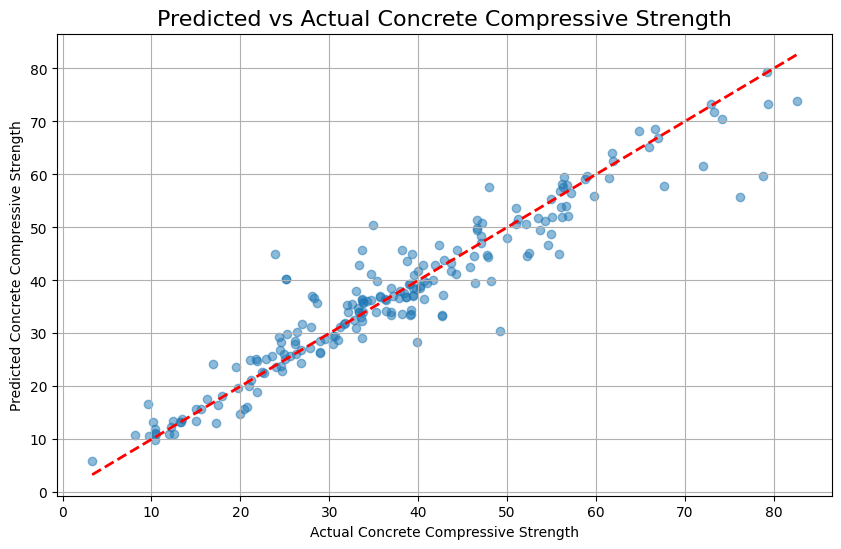

In [25]:
# Visualize the predicted vs actual concrete compressive strength
plt.figure(figsize=(10, 6))
plt.scatter(y_test, optimized_strength, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.title("Predicted vs Actual Concrete Compressive Strength", fontsize=16)
plt.xlabel("Actual Concrete Compressive Strength")
plt.ylabel("Predicted Concrete Compressive Strength")
plt.grid()
plt.show()

In [26]:
# First check the actual column names in the DataFrame
print("Actual column names in X_train:")
print(X_train.columns.tolist())

Actual column names in X_train:
['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age']


In [27]:
# Objective function for Bayesian optimization
def objective_function(params):
    """
    Objective function to minimize the negative of the compressive strength.
    This function takes a the parameters of the concrete mix and returns the negative compressive strength.
    """
    # Unpack the parameters
    (
        cement,
        slag,
        ash,
        water,
        superplasticizer,
        coarse_aggregate,
        fine_aggregate,
        age,
    ) = params
    # Create a DataFrame with the parameters
    concrete_mix = pd.DataFrame(
        {
            "Cement": [cement],
            "Blast Furnace Slag": [slag],
            "Fly Ash": [ash],
            "Water": [water],
            "Superplasticizer": [superplasticizer],
            "Coarse Aggregate": [coarse_aggregate],
            "Fine Aggregate": [fine_aggregate],
            "Age": [age],
        }
    )
    # Predict the compressive strength using the optimized model
    predicted_strength = opt.predict(concrete_mix)
    # Return the negative compressive strength (as we want to maximize it)
    return -predicted_strength[0]

In [28]:
# Define the search space for the parameters of the concrete mix based on the min and max values in the training set
search_space_concrete = [
    (X_train["Cement"].min(), X_train["Cement"].max()),  # Cement
    (X_train["Blast Furnace Slag"].min(), X_train["Blast Furnace Slag"].max()),  # Slag
    (X_train["Fly Ash"].min(), X_train["Fly Ash"].max()),  # Ash
    (X_train["Water"].min(), X_train["Water"].max()),  # Water
    (
        X_train["Superplasticizer"].min(),
        X_train["Superplasticizer"].max(),
    ),  # Superplasticizer
    (
        X_train["Coarse Aggregate"].min(),
        X_train["Coarse Aggregate"].max(),
    ),  # Coarse Aggregate
    (
        X_train["Fine Aggregate"].min(),
        X_train["Fine Aggregate"].max(),
    ),  # Fine Aggregate
    (X_train["Age"].min(), X_train["Age"].max()),  # Age
]

In [29]:
from skopt import gp_minimize

# Perform Bayesian optimization to find the optimal concrete mix parameters
result = gp_minimize(
    objective_function,
    search_space_concrete,
    n_calls=50,  # Number of evaluations
    random_state=random_state,
    verbose=True,
)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0328
Function value obtained: -59.1263
Current minimum: -59.1263
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0290
Function value obtained: -66.1417
Current minimum: -66.1417
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0282
Function value obtained: -46.5477
Current minimum: -66.1417
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0284
Function value obtained: -61.0239
Current minimum: -66.1417
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0309
Function value obtained: -63.1562
Current minimum: -66.1417
Iteration No: 6

In [30]:
# Neatly display the best parameters and the best predicted compressive strength along with column names
best_params = result.x
best_strength = -result.fun  # Negate the result to get the actual strength
print("Best parameters found by Bayesian optimization:")
for i, param in enumerate(best_params):
    print(f"{X_train.columns[i]}: {param}")
print(f"Best predicted Concrete Compressive Strength: {best_strength}")

Best parameters found by Bayesian optimization:
Cement: 508.0231464345416
Blast Furnace Slag: 319.24578750507516
Fly Ash: 33.44384739222112
Water: 183.84165599127212
Superplasticizer: 13.548303652841946
Coarse Aggregate: 898.344800636522
Fine Aggregate: 707.5272119559688
Age: 275
Best predicted Concrete Compressive Strength: 71.03958000000013


## Use XGBoost for the Model instead of Random Forest

In [31]:
from xgboost import XGBRegressor

In [32]:
# Define the XGBoost model
xgb_model = XGBRegressor(random_state=random_state, n_jobs=-1)

In [33]:
# Define the Bayesian optimization search for XGBoost hyperparameters
xgb_search_space = {
    "n_estimators": (50, 500),  # Number of trees in the forest
    "max_depth": (3, 10),  # Maximum depth of the tree
    "learning_rate": (
        0.01,
        0.3,
        "uniform",
    ),  # Step size shrinkage used in update to prevent overfitting
    "subsample": (0.5, 1.0, "uniform"),  # Subsample ratio of the training instances
    "colsample_bytree": (
        0.5,
        1.0,
        "uniform",
    ),  # Subsample ratio of columns when constructing each tree
    "gamma": (
        0,
        5,
    ),  # Minimum loss reduction required to make a further partition on a leaf
    "reg_alpha": (0, 1),  # L1 regularization term on weights
    "reg_lambda": (0, 1),  # L2 regularization term on weights
}

In [34]:
# Define the Bayesian optimization search for XGBoost
xgb_opt = BayesSearchCV(
    xgb_model,
    xgb_search_space,
    n_iter=50,  # Number of iterations for optimization
    scoring="neg_mean_squared_error",  # Objective function to minimize
    cv=5,  # Cross-validation splitting strategy
    n_jobs=-1,  # Use all available cores
    random_state=random_state,
)

In [35]:
# Fit the XGBoost model using Bayesian optimization
xgb_opt.fit(X_train, y_train.values.ravel())

,estimator,"XGBRegressor(...ree=None, ...)"
,search_spaces,"{'colsample_bytree': (0.5, ...), 'gamma': (0, ...), 'learning_rate': (0.01, ...), 'max_depth': (3, ...), ...}"
,optimizer_kwargs,None
,n_iter,50
,scoring,'neg_mean_squared_error'
,fit_params,None
,n_jobs,-1
,n_points,1
,iid,'deprecated'
,refit,True
,cv,5


In [36]:
# Display the best parameters found by Bayesian optimization for XGBoost
print("Best parameters found by Bayesian optimization for XGBoost:")
pprint(xgb_opt.best_params_)

Best parameters found by Bayesian optimization for XGBoost:
OrderedDict([('colsample_bytree', 0.5),
             ('gamma', 0),
             ('learning_rate', 0.12997377527067047),
             ('max_depth', 3),
             ('n_estimators', 500),
             ('reg_alpha', 1),
             ('reg_lambda', 1),
             ('subsample', 1.0)])


In [37]:
# Display the best score achieved by XGBoost
print(f"Best score achieved (negative MSE) by XGBoost: {xgb_opt.best_score_}")

Best score achieved (negative MSE) by XGBoost: -18.109858458765277


In [38]:
# Evaluate the optimized XGBoost model on the test set
y_pred_xgb = xgb_opt.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"Mean Squared Error on test set by XGBoost: {mse_xgb}")

Mean Squared Error on test set by XGBoost: 20.905860900878906


In [39]:
# Use the optimized XGBoost model to predict concrete compressive strength
optimized_strength_xgb = xgb_opt.predict(X_test)
print("Predicted Concrete Compressive Strength using Optimized XGBoost Model:")
print(optimized_strength_xgb)

Predicted Concrete Compressive Strength using Optimized XGBoost Model:
[23.740356  14.594155  33.993618  16.423445  29.30488   71.97607
 18.778902  51.92438   40.88      20.542473  36.622364  14.477582
 32.230774  34.06455    8.777008  27.103374  37.461926  59.38081
 60.18039   39.472153  21.34767   49.183018  19.553156  62.97228
 62.795803  43.22617   37.38158   30.633884  38.957188  15.453158
 41.572094  52.604286  29.71426   28.312275  34.06084   33.956253
 19.692728  24.990454  23.273666  17.638853  43.49817   13.726191
 48.948883  41.013927  36.440952  25.857813  33.49864   32.867054
 30.728909  47.774105  25.520466  35.28769   62.014122  50.782036
 56.521725   9.910221  39.08142   24.061956  32.26099   41.954597
 50.242603  43.358837  52.22585   53.901646  23.770044  35.823006
 53.645535  36.857906  39.04899   27.488827  28.155064  26.975792
 33.82244   10.526915  69.98183   58.88534   53.213303  17.144245
 59.199833  47.21806   41.027927  42.919624  54.24302   33.85491
 47.96896

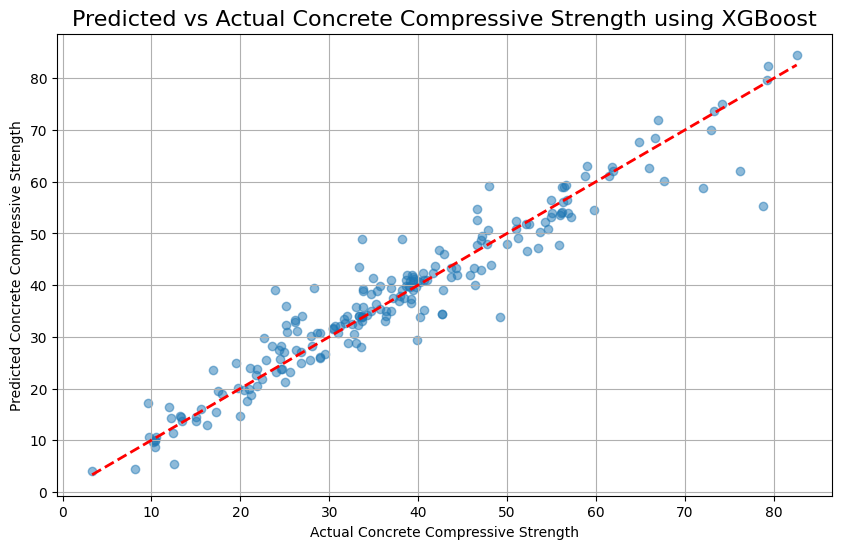

In [40]:
# Visualize the predicted vs actual concrete compressive strength using XGBoost
plt.figure(figsize=(10, 6))
plt.scatter(y_test, optimized_strength_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.title(
    "Predicted vs Actual Concrete Compressive Strength using XGBoost", fontsize=16
)
plt.xlabel("Actual Concrete Compressive Strength")
plt.ylabel("Predicted Concrete Compressive Strength")
plt.grid()
plt.show()

In [41]:
# Objective function for Bayesian optimization with XGBoost
def objective_function_xgb(params):
    """
    Objective function to minimize the negative of the compressive strength using XGBoost.
    This function takes the parameters of the concrete mix and returns the negative compressive strength.
    """
    # Unpack the parameters
    (
        cement,
        slag,
        ash,
        water,
        superplasticizer,
        coarse_aggregate,
        fine_aggregate,
        age,
    ) = params
    # Create a DataFrame with the parameters
    concrete_mix = pd.DataFrame(
        {
            "Cement": [cement],
            "Blast Furnace Slag": [slag],
            "Fly Ash": [ash],
            "Water": [water],
            "Superplasticizer": [superplasticizer],
            "Coarse Aggregate": [coarse_aggregate],
            "Fine Aggregate": [fine_aggregate],
            "Age": [age],
        }
    )
    # Predict the compressive strength using the optimized XGBoost model
    predicted_strength = xgb_opt.predict(concrete_mix)
    # Return the negative compressive strength (as we want to maximize it)
    return -predicted_strength[0]

In [42]:
# Define the search space for the parameters of the concrete mix based on the min and max values in the training set
search_space_concrete_xgb = [
    (X_train["Cement"].min(), X_train["Cement"].max()),  # Cement
    (X_train["Blast Furnace Slag"].min(), X_train["Blast Furnace Slag"].max()),  # Slag
    (X_train["Fly Ash"].min(), X_train["Fly Ash"].max()),  # Ash
    (X_train["Water"].min(), X_train["Water"].max()),  # Water
    (
        X_train["Superplasticizer"].min(),
        X_train["Superplasticizer"].max(),
    ),  # Superplasticizer
    (
        X_train["Coarse Aggregate"].min(),
        X_train["Coarse Aggregate"].max(),
    ),  # Coarse Aggregate
    (
        X_train["Fine Aggregate"].min(),
        X_train["Fine Aggregate"].max(),
    ),  # Fine Aggregate
    (X_train["Age"].min(), X_train["Age"].max()),  # Age
]

In [43]:
from skopt import gp_minimize

# Perform Bayesian optimization to find the optimal concrete mix parameters using XGBoost
result_xgb = gp_minimize(
    objective_function_xgb,
    search_space_concrete_xgb,
    n_calls=50,  # Number of evaluations
    random_state=random_state,
    verbose=True,
)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0039
Function value obtained: -67.6734
Current minimum: -67.6734
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0027
Function value obtained: -79.2550
Current minimum: -79.2550
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0026
Function value obtained: -52.8516
Current minimum: -79.2550
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0028
Function value obtained: -76.1550
Current minimum: -79.2550
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0027
Function value obtained: -58.4624
Current minimum: -79.2550
Iteration No: 6

In [44]:
# Neatly display the best parameters and the best predicted compressive strength along with column names for XGBoost
best_params_xgb = result_xgb.x
best_strength_xgb = -result_xgb.fun  # Negate the result to get the actual strength
print("Best parameters found by Bayesian optimization for XGBoost:")
for i, param in enumerate(best_params_xgb):
    print(f"{X_train.columns[i]}: {param}")
print(
    f"Best predicted Concrete Compressive Strength using XGBoost: {best_strength_xgb}"
)

Best parameters found by Bayesian optimization for XGBoost:
Cement: 540.0
Blast Furnace Slag: 333.2562932847105
Fly Ash: 0.0
Water: 143.54435171208848
Superplasticizer: 32.2
Coarse Aggregate: 979.2878494129013
Fine Aggregate: 773.0897074716215
Age: 365
Best predicted Concrete Compressive Strength using XGBoost: 93.5816421508789


# Human-in-the-Loop Preference Learning for Bayesian Optimization
A Human-in-the-Loop (HITL) approach to guide the Bayesian optimization process using preference learning is implemented. For simulation purposes, a human expert is simulated to provide subjective feedback on wine profiles, which will be used to train a user belief model. This model will then be combined with the main surrogate model to create a more informed acquisition function.

## Simulate the Human Expert
This will compare two concrete mix profiles and indicate a preference based on their proximity to a "golden standard" profile, which is defined using the best parameters found by the XGBoost optimization.

In [45]:
import numpy as np

# Golden standard profile based on XGBoost optimization results
golden_standard_profile = result_xgb.x


def simulate_human_expert(profile1, profile2):
    """
    Simulates a human expert's preference between two concrete mix profiles.
    The preference is based on the Euclidean distance to a golden standard profile.

    Args:
        profile1 (list): The first concrete mix profile.
        profile2 (list): The second concrete mix profile.

    Returns:
        int: 1 if profile1 is preferred, 0 otherwise.
    """
    dist1 = np.linalg.norm(np.array(profile1) - golden_standard_profile)
    dist2 = np.linalg.norm(np.array(profile2) - golden_standard_profile)
    if dist1 < dist2:
        return 1  # Prefers profile1
    else:
        return 0  # Prefers profile2


# # Example usage:
# # Create two random profiles for demonstration
# random_profile1 = [X_train.iloc[0, i] for i in range(X_train.shape[1])]
# random_profile2 = [X_train.iloc[1, i] for i in range(X_train.shape[1])]
# preference = simulate_human_expert(random_profile1, random_profile2)
# print(f"Simulated expert preference: {preference}")

## Implement the Preference Learning Component
This involves generating pairs of candidate concrete mix profiles, eliciting preferences from our simulated expert, and training a user belief model—a Gaussian Process Classifier (GPC)—on this preference data. The GPC will learn to predict the expert's preferences, which will help guide the optimization.

In [49]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
import warnings

# Suppress warnings from GPC
warnings.filterwarnings("ignore", category=UserWarning)

# Initialize the user belief model (GPC)
# A radial-basis function (RBF) kernel is a common choice
kernel = 1.0 * RBF(length_scale=1.0)
user_belief_model = GaussianProcessClassifier(kernel=kernel, random_state=random_state)

# Generate initial preference data to train the GPC
n_initial_pairs = 100
preference_data = []
preference_labels = []

for _ in range(n_initial_pairs):
    # Generate two random profiles from the search space
    x1 = [np.random.uniform(low, high) for low, high in search_space_concrete_xgb]
    x2 = [np.random.uniform(low, high) for low, high in search_space_concrete_xgb]

    # Get the simulated expert's preference
    preference = simulate_human_expert(x1, x2)

    # Store the preference data
    # We create a feature vector that is the difference between the two profiles
    preference_data.append(np.array(x1) - np.array(x2))
    preference_labels.append(preference)

# Train the initial user belief model
user_belief_model.fit(preference_data, preference_labels)

print("Initial user belief model trained.")

Initial user belief model trained.


## Modify the Bayesian Optimization Loop
A new acquisition function is created that combines the predictions from our main surrogate model (XGBoost) and the user belief model (GPC). This new function will guide the selection of candidate profiles by balancing predicted compressive strength with the simulated expert's preferences. A custom optimization loop is implemented to accommodate this HITL approach.

In [50]:
from scipy.optimize import minimize
import time

# --- Configuration ---
n_iterations = 50
n_candidates_per_iteration = (
    100  # Number of random candidates to evaluate with the acquisition function
)
acquisition_weight = 0.5  # Weight for combining surrogate and belief models

# --- Initialization ---
# Use the best XGBoost model as the main surrogate
main_surrogate_model = xgb_opt.best_estimator_

# Store the history of evaluated points and their objective values
evaluated_points = []
objective_values = []

# Store the convergence history
convergence_hitl = []
best_strength_so_far = -np.inf

# --- Custom Optimization Loop ---
start_time = time.time()

for i in range(n_iterations):
    print(f"--- Iteration {i+1}/{n_iterations} ---")

    # 1. Generate candidate profiles to evaluate with the acquisition function
    candidates = []
    for _ in range(n_candidates_per_iteration):
        candidate = [
            np.random.uniform(low, high) for low, high in search_space_concrete_xgb
        ]
        candidates.append(candidate)

    # 2. Define and evaluate the new acquisition function for each candidate
    def acquisition_function(x):
        x_df = pd.DataFrame([x], columns=X_train.columns)

        # a) Prediction from the main surrogate model (XGBoost)
        pred_strength = main_surrogate_model.predict(x_df)[0]

        # b) Prediction from the user belief model (GPC)
        pred_preference = user_belief_model.predict_proba(np.array(x).reshape(1, -1))[
            0
        ][1]

        # c) Combine the two predictions (weighted average)
        return (
            acquisition_weight * pred_strength
            + (1 - acquisition_weight) * pred_preference
        )

    # Evaluate acquisition function for all candidates
    acquisition_scores = [acquisition_function(c) for c in candidates]

    # 3. Select the best candidate
    best_candidate_index = np.argmax(acquisition_scores)
    next_point = candidates[best_candidate_index]
    print(f"Selected new point to evaluate.")

    # 4. Evaluate the selected point with the true objective function
    true_objective_value = -objective_function_xgb(next_point)  # Negate to get strength
    print(f"True strength of new point: {true_objective_value:.4f}")

    # Store the results
    evaluated_points.append(next_point)
    objective_values.append(true_objective_value)

    # Update convergence tracking
    if true_objective_value > best_strength_so_far:
        best_strength_so_far = true_objective_value
    convergence_hitl.append(best_strength_so_far)

    # 5. Update the user belief model with new preference data
    if len(evaluated_points) > 1:
        random_index = np.random.randint(0, len(evaluated_points) - 1)
        profile1 = next_point
        profile2 = evaluated_points[random_index]

        preference = simulate_human_expert(profile1, profile2)

        if preference == 1:
            new_data_point = np.array(profile1) - np.array(profile2)
            new_label = 1
        else:
            new_data_point = np.array(profile2) - np.array(profile1)
            new_label = 1

        preference_data.append(new_data_point)
        preference_labels.append(new_label)
        user_belief_model.fit(preference_data, preference_labels)
        print("User belief model updated.")

end_time = time.time()
print(f"\nHITL optimization finished in {end_time - start_time:.2f} seconds.")

# --- Final Results ---
best_hitl_index = np.argmax(objective_values)
best_params_hitl = evaluated_points[best_hitl_index]
best_strength_hitl = objective_values[best_hitl_index]

print("\nBest parameters found by HITL Bayesian optimization:")
for i, param in enumerate(best_params_hitl):
    print(f"{X_train.columns[i]}: {param}")
print(f"\nBest predicted compressive strength using HITL: {best_strength_hitl}")

--- Iteration 1/50 ---
Selected new point to evaluate.
True strength of new point: 87.2008
--- Iteration 2/50 ---
Selected new point to evaluate.
True strength of new point: 83.4872
User belief model updated.
--- Iteration 3/50 ---
Selected new point to evaluate.
True strength of new point: 79.2230
User belief model updated.
--- Iteration 4/50 ---
Selected new point to evaluate.
True strength of new point: 84.3354
User belief model updated.
--- Iteration 5/50 ---
Selected new point to evaluate.
True strength of new point: 86.4615
User belief model updated.
--- Iteration 6/50 ---
Selected new point to evaluate.
True strength of new point: 83.5354
User belief model updated.
--- Iteration 7/50 ---
Selected new point to evaluate.
True strength of new point: 81.6480
User belief model updated.
--- Iteration 8/50 ---
Selected new point to evaluate.
True strength of new point: 86.1526
User belief model updated.
--- Iteration 9/50 ---
Selected new point to evaluate.
True strength of new point: 

## Final Evaluation


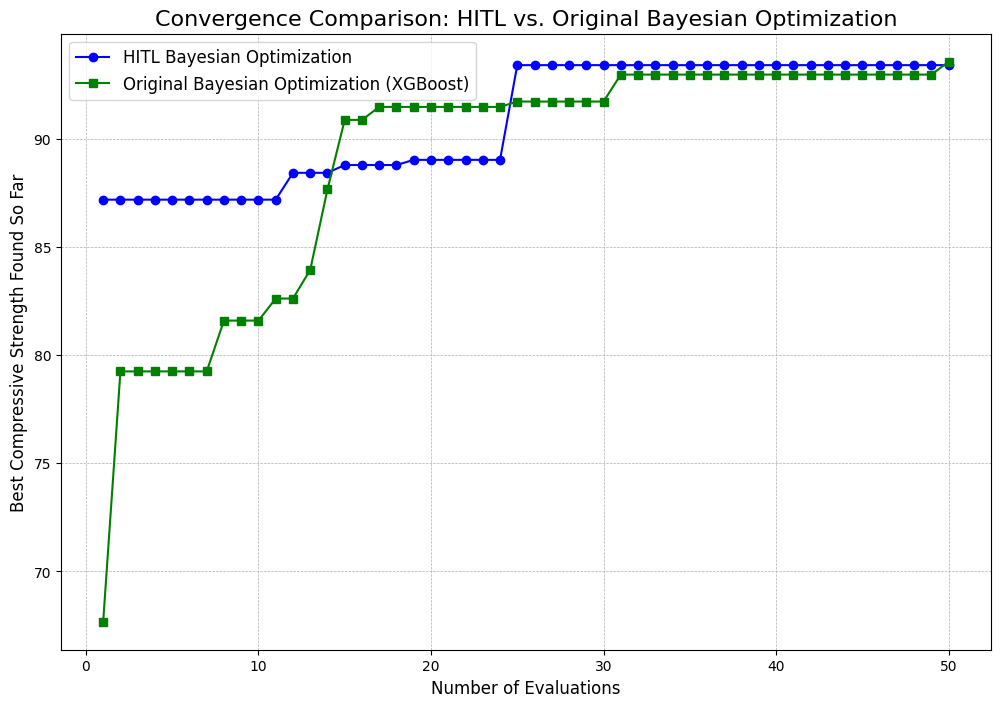

--- Comparison of Best Results ---

Original Bayesian Optimization (XGBoost):
  Best Compressive Strength: 93.5816
  Best Profile:
    Cement: 540.0000
    Blast Furnace Slag: 333.2563
    Fly Ash: 0.0000
    Water: 143.5444
    Superplasticizer: 32.2000
    Coarse Aggregate: 979.2878
    Fine Aggregate: 773.0897
    Age: 365.0000

HITL Bayesian Optimization:
  Best Compressive Strength: 93.4233
  Best Profile:
    Cement: 500.2912
    Blast Furnace Slag: 286.2029
    Fly Ash: 50.6704
    Water: 138.3245
    Superplasticizer: 12.2285
    Coarse Aggregate: 1130.6467
    Fine Aggregate: 721.2176
    Age: 127.3146


In [51]:
# --- Prepare Data for Comparison ---
# Get the convergence data from the original gp_minimize result
convergence_original = np.maximum.accumulate(-np.array(result_xgb.func_vals))

# Ensure both convergence plots are of the same length
num_evaluations = min(len(convergence_hitl), len(convergence_original))
convergence_hitl_plot = convergence_hitl[:num_evaluations]
convergence_original_plot = convergence_original[:num_evaluations]

# --- Plotting the Convergence ---
plt.figure(figsize=(12, 8))
plt.plot(
    range(1, num_evaluations + 1),
    convergence_hitl_plot,
    "o-",
    label="HITL Bayesian Optimization",
    color="blue",
)
plt.plot(
    range(1, num_evaluations + 1),
    convergence_original_plot,
    "s-",
    label="Original Bayesian Optimization (XGBoost)",
    color="green",
)
plt.title(
    "Convergence Comparison: HITL vs. Original Bayesian Optimization", fontsize=16
)
plt.xlabel("Number of Evaluations", fontsize=12)
plt.ylabel("Best Compressive Strength Found So Far", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# --- Comparing the Best Results ---
print("--- Comparison of Best Results ---")
print("\nOriginal Bayesian Optimization (XGBoost):")
print(f"  Best Compressive Strength: {best_strength_xgb:.4f}")
print("  Best Profile:")
for i, param in enumerate(best_params_xgb):
    print(f"    {X_train.columns[i]}: {param:.4f}")

print("\nHITL Bayesian Optimization:")
print(f"  Best Compressive Strength: {best_strength_hitl:.4f}")
print("  Best Profile:")
for i, param in enumerate(best_params_hitl):
    print(f"    {X_train.columns[i]}: {param:.4f}")